In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
df = pd.read_csv("../models/training_data_large/prod_data_20130729v.txt", sep=" ", usecols=[0,1,2,3,4,5], index_col = 0, header = None, names = ["time","mp","bidpx_","bidsz_","askpx_","asksz_",])

In [11]:
% matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [13]:
import sys
sys.path.insert(0, '../models')

In [14]:
from create_signals_bid_ask import find_signals, filter_signals

In [15]:
from create_signals_bid_ask import make_spans

In [16]:
from create_signals_bid_ask import __main__

In [17]:
df.describe()

,mp,bidpx_,bidsz_,askpx_,asksz_
count,53353.000000,53353.000000,53353.000000,53353.000000,53353.000000
mean,4528.503695,4527.986467,292.032126,4529.025566,314.730943
std,7.091962,7.096300,402.466606,7.092489,268.652928
min,4513.442966,4513.000000,10.000000,4514.000000,10.000000
25%,4523.483634,4523.000000,130.000000,4524.000000,120.000000
50%,4528.321634,4528.000000,220.000000,4529.000000,240.000000
75%,4533.542640,4533.000000,360.000000,4534.000000,450.000000
max,4544.511066,4544.000000,7430.000000,4545.000000,2570.000000


In [7]:
df.index[0]

43274820

In [8]:
df.index[-1]

71999993

In [14]:
df.iloc[-1]

mp        4451.578018
bidpx_    4451.000000
bidsz_     350.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71999993, dtype: float64

In [27]:
df.iloc[-4]

mp        4451.524934
bidpx_    4451.000000
bidsz_     320.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71998488, dtype: float64

In [18]:
diff_df = df.diff()

In [19]:
diff_df.describe()

,mp,bidpx_,bidsz_,askpx_,asksz_
count,53924.000000,53924.000000,53924.000000,53924.000000,53924.000000
mean,-0.000625,-0.000631,0.006120,-0.000631,-0.004822
std,0.098591,0.146669,129.519668,0.150784,132.141165
min,-2.150004,-3.000000,-12410.000000,-2.000000,-3340.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.966846,2.000000,12410.000000,2.000000,3270.000000


In [21]:
lagged_df = df.shift(1)

In [22]:
lagged_df.iloc[-1]

mp        4451.578018
bidpx_    4451.000000
bidsz_     350.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71999993, dtype: float64

In [28]:
lagged_df.iloc[-3]

mp        4451.524934
bidpx_    4451.000000
bidsz_     320.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71998990, dtype: float64

In [10]:
lagged_df.index[-1]

71999993

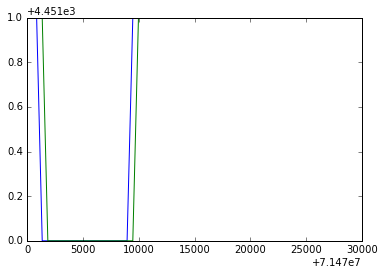

In [40]:
plt.plot(df["bidpx_"].iloc[-1000:-950])
plt.plot(lagged_df["bidpx_"].iloc[-1000:-950])

In [48]:
ask_to_bid = df["askpx_"] - lagged_df["bidpx_"]

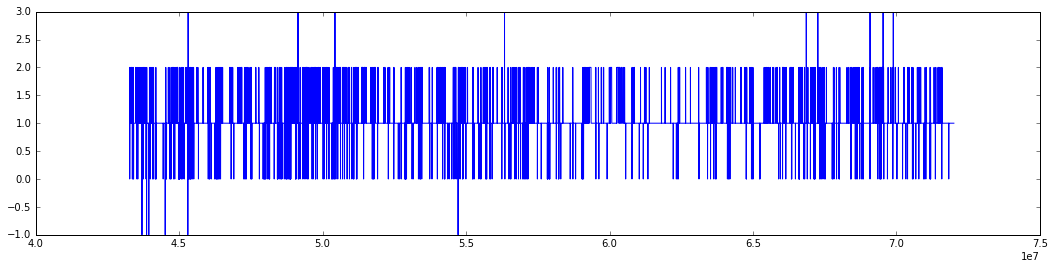

In [49]:
plt.figure(figsize=(18, 4))
plt.plot(ask_to_bid)

In [50]:
bid_to_ask = df["bidpx_"] - lagged_df["askpx_"]

In [60]:
log_ret_buy = df["bidpx_"].apply(np.log) - lagged_df["askpx_"].apply(np.log)

In [75]:
log_ret_bid = df["bidpx_"].apply(np.log) - lagged_df["bidpx_"].apply(np.log)

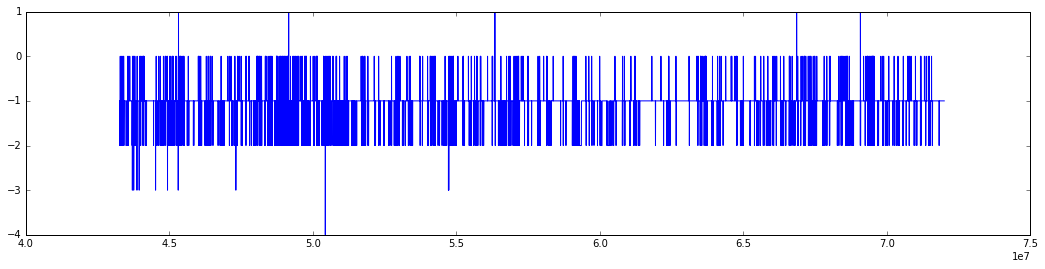

In [51]:
plt.figure(figsize=(18, 4))
plt.plot(bid_to_ask)

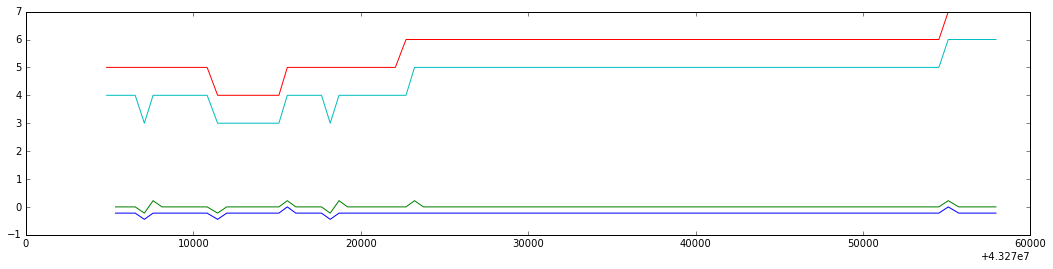

In [77]:
plt.figure(figsize=(18, 4))
plt.plot(log_ret_buy.iloc[0:100]*1000)
plt.plot(log_ret_bid.iloc[0:100]*1000)
#plt.plot(log_ret_buy.cumsum().iloc[0:500]*1000)
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100]-4481)

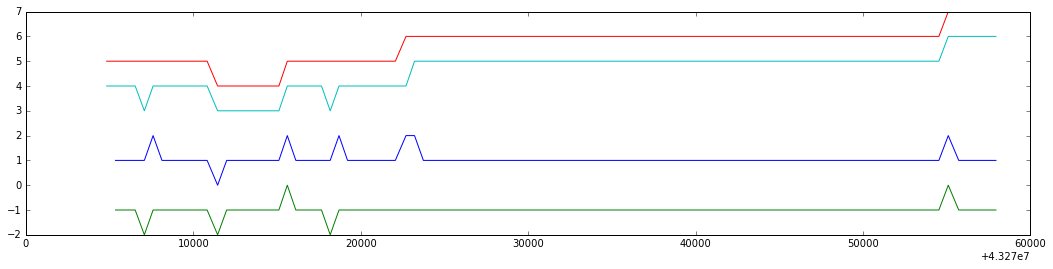

In [58]:
plt.figure(figsize=(18, 4))
plt.plot(ask_to_bid.iloc[0:100])
plt.plot(bid_to_ask.iloc[0:100])
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100]-4481)

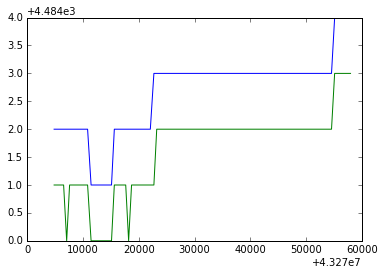

In [56]:
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100])

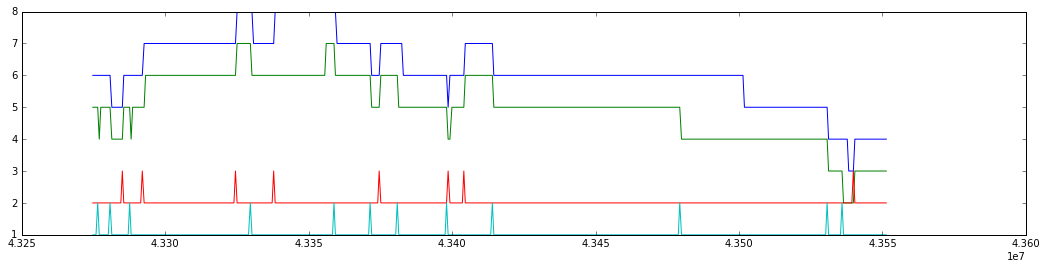

In [43]:
plt.figure(figsize=(18, 4))
#plt.plot((df["askpx_"]-df["bidpx_"]).diff().iloc[0:200]+2)
#plt.plot(df.diff()[["askpx_", "bidpx_"]].iloc[0:300])
# plt.plot(df.diff()["bidpx_"].iloc[0:300])
# plt.plot(df.diff()["askpx_"].iloc[0:300]+2)
# plt.plot(df.diff().shift(-1)["bidpx_"].iloc[0:250])
# plt.plot(df.diff().shift(-1)["askpx_"].iloc[0:250]+2)
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:500]-4480)
plt.plot(inflection_points_buy.iloc[0:500]+2)
plt.plot(inflection_points_sell.iloc[0:500]+1)

In [9]:
inflection_points_buy = df["askpx_"].diff().shift(-1) > 0

In [10]:
inflection_points_sell = df["bidpx_"].diff().shift(-1) < 0

In [11]:
df['Buy'] = np.zeros(df.shape[0])
df['Sell'] = np.zeros(df.shape[0])
df['Buy Close'] = np.zeros(df.shape[0])
df['Sell Close'] = np.zeros(df.shape[0])

comission = 0.0

buy_iterator = inflection_points_buy.iteritems()

#print(df[df['Sell']==1])

max_count = 0

for idx_buy, val_buy in buy_iterator:
    if max_count > 10000:
        break
    sell_iterator = inflection_points_sell.loc[idx_buy:].iteritems()
    if df[df['Sell Close']==1].empty:
        can_open = True
    else:
        can_open = idx_buy > df[df['Sell Close']==1].index[-1]
#         print("Idx:", idx_buy)
#         print("Last buy:", df[df['Sell']==1].index[-1])
#         print(can_open)
    max_count += 1
    if val_buy and can_open:
        print("Buy candidate at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
        # sell_candidate = sell_iterator.next()
        for idx_sell, val_sell in sell_iterator:
            if idx_sell > idx_buy: # and val_sell:
                if df["askpx_"][idx_sell] < df["askpx_"][idx_buy] and inflection_points_buy[idx_sell]:
                    print("Better buy candidate at {} with price {}, break...".format(idx_sell, df["askpx_"][idx_sell]))
                    break
                            
                if df["bidpx_"][idx_sell] > (df["askpx_"][idx_buy] + comission) and val_sell:
                    # print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    df['Buy'][idx_buy] = 1
                    df['Sell Close'][idx_sell] = 1
                    print("Buy at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
                    print("Sell at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    break

sell_iterator = inflection_points_sell.iteritems()
max_count = 0
                    
for idx_sell, val_sell in sell_iterator:
    if max_count > 10000:
        break
    buy_iterator = inflection_points_buy.loc[idx_sell:].iteritems()
    if df[df['Buy Close']==1].empty:
        can_open = True
    else:
        can_open = idx_sell > df[df['Buy Close']==1].index[-1]
#         print("Idx:", idx_buy)
#         print("Last buy:", df[df['Sell']==1].index[-1])
#         print(can_open)
    max_count += 1
    if val_sell and can_open:
        print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
        # sell_candidate = sell_iterator.next()
        for idx_buy, val_buy in buy_iterator:
            if idx_buy > idx_sell: # and val_sell:
                if df["bidpx_"][idx_buy] > df["bidpx_"][idx_sell] and inflection_points_sell[idx_buy]:
                    print("Better sell candidate at {} with price {}, break...".format(idx_buy, df["bidpx_"][idx_buy]))
                    break
                            
                if df["askpx_"][idx_buy] < (df["bidpx_"][idx_sell] - comission) and val_buy:
                    # print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    df['Buy Close'][idx_buy] = 1
                    df['Sell'][idx_sell] = 1
                    print("Buy at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
                    print("Sell at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    break

Buy candidate at 43285110 with price 4485.0
Buy at 43285110 with price 4485.0
Sell at 43329720 with price 4487.0
Buy candidate at 43337846 with price 4487.0
Better buy candidate at 43374613 with price 4486.0, break...
Buy candidate at 43374613 with price 4486.0
Better buy candidate at 43398637 with price 4485.0, break...
Buy candidate at 43398637 with price 4485.0
Buy at 43398637 with price 4485.0
Sell at 43414057 with price 4486.0
Buy candidate at 43539853 with price 4483.0
Buy at 43539853 with price 4483.0
Sell at 43707157 with price 4486.0
Buy candidate at 43711906 with price 4485.0
Buy at 43711906 with price 4485.0
Sell at 43754533 with price 4486.0
Buy candidate at 43760433 with price 4485.0
Buy at 43760433 with price 4485.0
Sell at 43819669 with price 4489.0
Buy candidate at 43823794 with price 4489.0
Better buy candidate at 43873826 with price 4485.0, break...
Buy candidate at 43873826 with price 4485.0
Better buy candidate at 43968323 with price 4483.0, break...
Buy candidate a

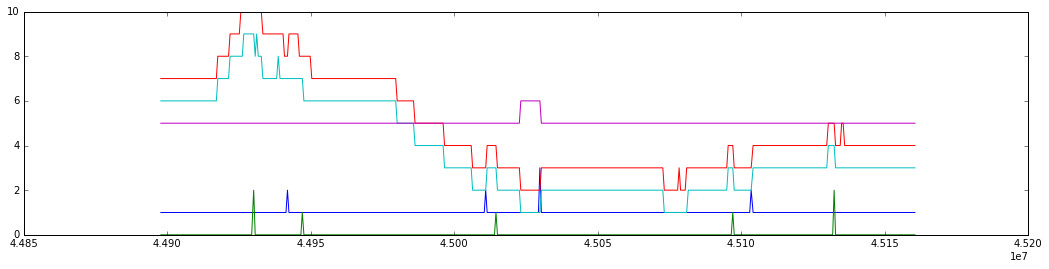

In [166]:
points = 500
start_point = 3000

plt.figure(figsize=(18, 4))
plt.plot(df["Buy"].iloc[start_point:start_point+points]+df["Buy Close"].iloc[start_point:start_point+points]+1)
#plt.plot(df["Buy Close"].iloc[start_point:start_point+points]+1)
plt.plot(df["Sell"].iloc[start_point:start_point+points]+df["Sell Close"].iloc[start_point:start_point+points])
#plt.plot(df["Sell Close"].iloc[start_point:start_point+points])
plt.plot(df[["askpx_", "bidpx_"]].iloc[start_point:start_point+points]-4470)
# plt.plot(df.diff().shift(-1)["bidpx_"].iloc[0:points]-5)
# plt.plot(df.diff().shift(-1)["askpx_"].iloc[0:points]-3)
# plt.plot(inflection_points_buy.iloc[start_point:start_point+points]+10)
# plt.plot(inflection_points_sell.iloc[start_point:start_point+points]+9)
plt.plot(temp_df[start_point:start_point+points]+5)

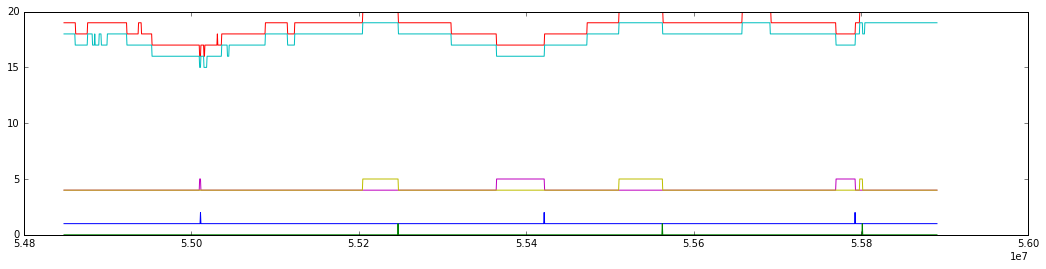

In [42]:
points = 2000
start_point = 22000

plt.figure(figsize=(18, 4))
plt.plot(df["Buy"].iloc[start_point:start_point+points]+1)
plt.plot(df["Sell"].iloc[start_point:start_point+points])
plt.plot(df[["askpx_", "bidpx_"]].iloc[start_point:start_point+points]-4510)
plt.plot(df1[["Buys", "Sells"]][start_point:start_point+points]+4)

In [18]:
df = find_signals(df, "Buy")

Buy candidate at 43285568 with price 4519.0
Buy at 43285568 with price 4519.0
Sell at 43313029 with price 4523.0
Buy candidate at 43330107 with price 4521.0
Better Buy candidate at 43341796 with price 4520.0, break...
Buy candidate at 43341796 with price 4520.0
Buy at 43341796 with price 4520.0
Sell at 43346665 with price 4522.0
Buy candidate at 43358467 with price 4522.0
Better Buy candidate at 43463768 with price 4520.0, break...
Buy candidate at 43463768 with price 4520.0
Better Buy candidate at 43488857 with price 4518.0, break...
Buy candidate at 43488857 with price 4518.0
Better Buy candidate at 43583544 with price 4516.0, break...
Buy candidate at 43498562 with price 4519.0
Better Buy candidate at 43583544 with price 4516.0, break...
Buy candidate at 43583544 with price 4516.0
Buy at 43583544 with price 4516.0
Sell at 43646310 with price 4517.0
Buy candidate at 43755771 with price 4516.0
Buy at 43755771 with price 4516.0
Sell at 43830079 with price 4517.0
Buy candidate at 438626

In [15]:
df["Buy Close"].equals(df_buy["Buy Close"])

True

In [19]:
df1 = find_signals(df, "Sell")

Sell candidate at 43276926 with price 4520.0
Better Sell candidate at 43313029 with price 4523.0, break...
Sell candidate at 43313029 with price 4524.0
Sell at 43313029 with price 4523.0
Buy at 43330107 with price 4521.0
Sell candidate at 43333351 with price 4521.0
Better Sell candidate at 43346665 with price 4522.0, break...
Sell candidate at 43339673 with price 4521.0
Better Sell candidate at 43346665 with price 4522.0, break...
Sell candidate at 43346665 with price 4523.0
Sell at 43346665 with price 4522.0
Buy at 43463768 with price 4520.0
Sell candidate at 43464914 with price 4521.0
Sell at 43464914 with price 4520.0
Buy at 43488857 with price 4518.0
Sell candidate at 43493850 with price 4519.0
Sell at 43493850 with price 4518.0
Buy at 43583544 with price 4516.0
Sell candidate at 43646310 with price 4518.0
Sell at 43646310 with price 4517.0
Buy at 43755771 with price 4516.0
Sell candidate at 43830079 with price 4518.0
Sell at 43830079 with price 4517.0
Buy at 43862666 with price 45

In [16]:
df["Sell Close"].equals(df_buy["Sell Close"])

True

In [11]:
df.columns

Index([u'mp', u'bidpx_', u'bidsz_', u'askpx_', u'asksz_', u'Buy', u'Sell'], dtype='object')

In [20]:
df = filter_signals(df)

In [21]:
df1 = make_spans(df, "Buy")

Outer loop: 43583544 4516.0
Inner loop: 43583544 4516.0
Add to buys
Inner loop: 43583037 4516.0
Add to buys
Inner loop: 43582517 4516.0
Add to buys
Inner loop: 43581991 4516.0
Add to buys
Inner loop: 43581485 4516.0
Add to buys
Inner loop: 43580970 4517.0
Outer loop: 43755771 4516.0
Inner loop: 43755771 4516.0
Add to buys
Inner loop: 43755270 4516.0
Add to buys
Inner loop: 43754747 4516.0
Add to buys
Inner loop: 43754220 4516.0
Add to buys
Inner loop: 43753670 4516.0
Add to buys
Inner loop: 43753152 4516.0
Add to buys
Inner loop: 43752605 4517.0
Outer loop: 43862666 4516.0
Inner loop: 43862666 4516.0
Add to buys
Inner loop: 43862115 4516.0
Add to buys
Inner loop: 43861585 4516.0
Add to buys
Inner loop: 43861074 4516.0
Add to buys
Inner loop: 43860573 4516.0
Add to buys
Inner loop: 43860065 4516.0
Add to buys
Inner loop: 43859560 4516.0
Add to buys
Inner loop: 43859052 4516.0
Add to buys
Inner loop: 43858495 4516.0
Add to buys
Inner loop: 43857929 4516.0
Add to buys
Inner loop: 43857363

In [22]:
df1 = make_spans(df1, "Sell")

Outer loop: 43313029 4523.0
Inner loop: 43313029 4523.0
Add to sells
Inner loop: 43312494 4523.0
Add to sells
Inner loop: 43311981 4523.0
Add to sells
Inner loop: 43311478 4523.0
Add to sells
Inner loop: 43310970 4523.0
Add to sells
Inner loop: 43310450 4523.0
Add to sells
Inner loop: 43309930 4523.0
Add to sells
Inner loop: 43309398 4523.0
Add to sells
Inner loop: 43308868 4523.0
Add to sells
Inner loop: 43308366 4523.0
Add to sells
Inner loop: 43307648 4523.0
Add to sells
Inner loop: 43307081 4523.0
Add to sells
Inner loop: 43306565 4523.0
Add to sells
Inner loop: 43306059 4523.0
Add to sells
Inner loop: 43305440 4523.0
Add to sells
Inner loop: 43304774 4523.0
Add to sells
Inner loop: 43304188 4523.0
Add to sells
Inner loop: 43303665 4523.0
Add to sells
Inner loop: 43303132 4523.0
Add to sells
Inner loop: 43302630 4522.0
Outer loop: 43346665 4522.0
Inner loop: 43346665 4522.0
Add to sells
Inner loop: 43346084 4522.0
Add to sells
Inner loop: 43345568 4522.0
Add to sells
Inner loop: 43

In [12]:
df1["Sell"]

time
43274820    0
43275348    0
43275936    0
43276526    0
43277073    0
43277595    0
43278125    0
43278668    0
43279186    0
43279710    0
43280221    0
43280824    0
43281450    0
43281990    0
43282553    0
43283055    0
43283571    0
43284087    0
43284588    0
43285110    0
43285613    0
43286122    0
43286623    0
43287151    0
43287656    0
43288176    0
43288701    0
43289211    0
43289727    0
43290313    0
43291012    0
43291521    0
43292066    0
43292704    0
43293212    0
43293741    0
43294259    0
43294824    0
43295346    0
43295877    0
43296389    0
43296983    0
43297491    0
43297995    0
43298531    0
43299034    0
43299535    0
43300065    0
43300568    0
43301069    0
43301572    0
43302107    0
43302615    0
43303125    0
43303765    0
43304285    0
43304789    0
43305293    0
43305809    0
43306358    0
43306872    0
43307446    0
43307967    0
43308476    0
43308981    0
43309502    0
43310067    0
43310570    0
43311074    0
43311638    0
43312145    0
4

In [180]:
df.loc[45020000:45035000, "askpx_"]

time
45020100    4473
45020601    4473
45021102    4473
45021605    4473
45022106    4473
45022633    4473
45023138    4472
45023662    4472
45024178    4472
45024682    4472
45025184    4472
45025693    4472
45026213    4472
45026717    4472
45027231    4472
45027733    4472
45028268    4472
45028781    4472
45029284    4472
45029785    4472
45030295    4473
45030829    4473
45031332    4473
45031846    4473
45032348    4473
45032855    4473
45033370    4473
45033899    4473
45034429    4473
45034931    4473
Name: askpx_, dtype: float64

In [27]:
pnl = df["bidpx_"][df["Sell"]==1].sum() - df["askpx_"][df["Buy"]==1].sum()

In [29]:
df["bidpx_"][df["Sell"]==1].sum()

223129.0

In [30]:
df["askpx_"][df["Buy"]==1].sum()

218497.0

In [31]:
df["bidpx_"][df["Sell"]==1].count()

50

In [26]:
deals = []
pnl = 0

is_opened = False

for idx, row in df.iterrows():
    if row["Buy"]:
        if is_opened:
            deals.append(-row["askpx_"])
        deals.append(-row["askpx_"])
        is_opened = True
    elif row["Sell"]:
        if is_opened:
            deals.append(row["bidpx_"])
        deals.append(row["bidpx_"])
        is_opened = True

deals.pop()

-4451.0

In [35]:
deals

[4487.0,
 -4485.0,
 -4485.0,
 4486.0,
 4486.0,
 -4483.0,
 -4483.0,
 4486.0,
 4486.0,
 -4485.0,
 -4485.0,
 4486.0,
 4486.0,
 -4485.0,
 -4485.0,
 4489.0,
 4489.0,
 -4483.0,
 -4483.0,
 4487.0,
 4487.0,
 -4475.0,
 -4475.0,
 4479.0,
 4479.0,
 -4472.0,
 -4472.0,
 4474.0,
 4474.0,
 -4469.0,
 -4469.0,
 4471.0,
 4471.0,
 -4470.0,
 -4470.0,
 4472.0,
 4472.0,
 -4471.0,
 -4471.0,
 4473.0,
 4473.0,
 -4463.0,
 -4463.0,
 4466.0,
 4466.0,
 -4465.0,
 -4465.0,
 4467.0,
 4467.0,
 -4459.0,
 -4459.0,
 4462.0,
 4462.0,
 -4461.0,
 -4461.0,
 4463.0,
 4463.0,
 -4457.0,
 -4457.0,
 4464.0,
 4464.0,
 -4462.0,
 -4462.0,
 4463.0,
 4463.0,
 -4460.0,
 -4460.0,
 4462.0,
 4462.0,
 -4457.0,
 -4457.0,
 4466.0,
 4466.0,
 -4464.0,
 -4464.0,
 4467.0,
 4467.0,
 -4466.0,
 -4466.0,
 4468.0,
 4468.0,
 -4467.0,
 -4467.0,
 4468.0,
 4468.0,
 -4467.0,
 -4467.0,
 4470.0,
 4470.0,
 -4469.0,
 -4469.0,
 4470.0,
 4470.0,
 -4463.0,
 -4463.0,
 4464.0,
 4464.0,
 -4463.0,
 -4463.0,
 4469.0,
 4469.0,
 -4468.0,
 -4468.0,
 4470.0,
 4470.0,
 -4

In [29]:
np.sum(deals)

9228.0

In [32]:
df["bidpx_"][df["Buy"]==1].count()

49

In [109]:
buys = df["Buy"]+df["Buy Close"]

In [111]:
buys[buys == 2]

time
43398637    2
43539853    2
43711906    2
43760433    2
43968323    2
44851529    2
45029785    2
45315102    2
45382019    2
45656225    2
46421086    2
47036689    2
47377881    2
47520428    2
48045669    2
48500703    2
dtype: float64

In [112]:
sells = df["Sell"]+df["Sell Close"]

In [113]:
sells[sells == 2]

time
43329720    2
43414057    2
43707157    2
43754533    2
43819669    2
44103767    2
44930050    2
45132322    2
45341752    2
45498606    2
46056106    2
46813887    2
47171589    2
47501220    2
47798319    2
48426560    2
48532237    2
dtype: float64

In [159]:
temp_df = pd.DataFrame(data=np.zeros(df.shape[0]), columns=["Buys"], index=df.index)
reversed_df = df[::-1]

max_count = 0
for idx in buys[buys == 2].index:
    signal_val = df.loc[idx]
    iterator = reversed_df.loc[idx:].iterrows()
    # print(iterator)
    print("Outer loop:", idx, signal_val["askpx_"])
#     print(iterator.next())
    for i, val in iterator:
        print("Inner loop:", i, val["askpx_"])
        if val["askpx_"] == signal_val["askpx_"]:
            print("Add to buys")
            temp_df["Buys"][i] = 1
        else:
            break

('Outer loop:', 43398637, 4485.0)
('Inner loop:', 43398637, 4485.0)
Add to buys
('Inner loop:', 43398095, 4486.0)
('Outer loop:', 43539853, 4483.0)
('Inner loop:', 43539853, 4483.0)
Add to buys
('Inner loop:', 43539320, 4483.0)
Add to buys
('Inner loop:', 43538787, 4483.0)
Add to buys
('Inner loop:', 43538236, 4483.0)
Add to buys
('Inner loop:', 43537720, 4484.0)
('Outer loop:', 43711906, 4485.0)
('Inner loop:', 43711906, 4485.0)
Add to buys
('Inner loop:', 43711405, 4485.0)
Add to buys
('Inner loop:', 43710903, 4485.0)
Add to buys
('Inner loop:', 43710394, 4485.0)
Add to buys
('Inner loop:', 43709878, 4485.0)
Add to buys
('Inner loop:', 43709371, 4485.0)
Add to buys
('Inner loop:', 43708841, 4485.0)
Add to buys
('Inner loop:', 43708310, 4485.0)
Add to buys
('Inner loop:', 43707747, 4485.0)
Add to buys
('Inner loop:', 43707157, 4487.0)
('Outer loop:', 43760433, 4485.0)
('Inner loop:', 43760433, 4485.0)
Add to buys
('Inner loop:', 43759929, 4485.0)
Add to buys
('Inner loop:', 43759378, 

In [ ]:
def span(df, )

In [148]:
temp_df

,Buys
time,
43274820,0
43275348,0
43275936,0
43276526,0
43277073,0
43277595,0
43278125,0
43278668,0
43279186,0


In [128]:
df.ix[43398637:43398637]

,mp,bidpx_,bidsz_,askpx_,asksz_,Buy,Sell,Buy Close,Sell Close
time,,,,,,,,,
43398637,4484.74106,4484,120,4485,10,1,0,1,0
